<a href="https://colab.research.google.com/github/Juacardonaca/Carpeta1SyS-/blob/main/SerieyTransformadadeFourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejercicios Transformada de Fourier**

2.1 Serie de Fourier


*   **Exponencial:** Usa funciones exponenciales complejas para representar la señal.
*   **Trigonométrica:** Representa señales como suma de senos y cosenos.

*   **Compacta:** Usa senos y cosenos con un único coeficiente para representar amplitud y fase.

Transformada de Fourier en tiempo discreto


*   Representa el espectro de frecuencias de una señal discreta en un dominio
continuo.

**Semejanzas entre serie y transformada**


*   Ambas descomponen señales en componentes de frecuencia, permitiendo analizar la información espectral.
*   Transforman señales desde el dominio del tiempo al dominio de frecuencia.
*   Ambas cumplen la propiedad de linealidad.

**Diferencias entre serie transformada**


*   El propósito de la Serie es descomponer señales preiódicas en armónicos mientras que el de la Transformada es representar señales discretas en el dominio de frecuencia.
*   Según el tipo de frecuencia, la serie maneja frecuencias armónicas discretas mientras que la transformada las frecuencias son continuas pero están limitadas a un intervalo.
*   La serie se aplica a señales periódicas y continuas en el tiempo, y la transformada se aplica a señales discretas en el tiempo.

2.4 La modulación por amplitud con detección coherente consiste en modificar la amplitud de una señal portadora en proporción a la amplitud de una señal de mensaje que es de baja frecuencia. En la detección coherente, la señal modulada se demodula utilizando un oscilador sincronizado con la portadora, lo que permite recuperar la señal original.

**Aplicaciones**

*   Usada para transmitir señales de voz y audio.
*   Para transmitir datos analógicos sobre ondas portadoras.
*   Para detección de objetos y medición de distancia.

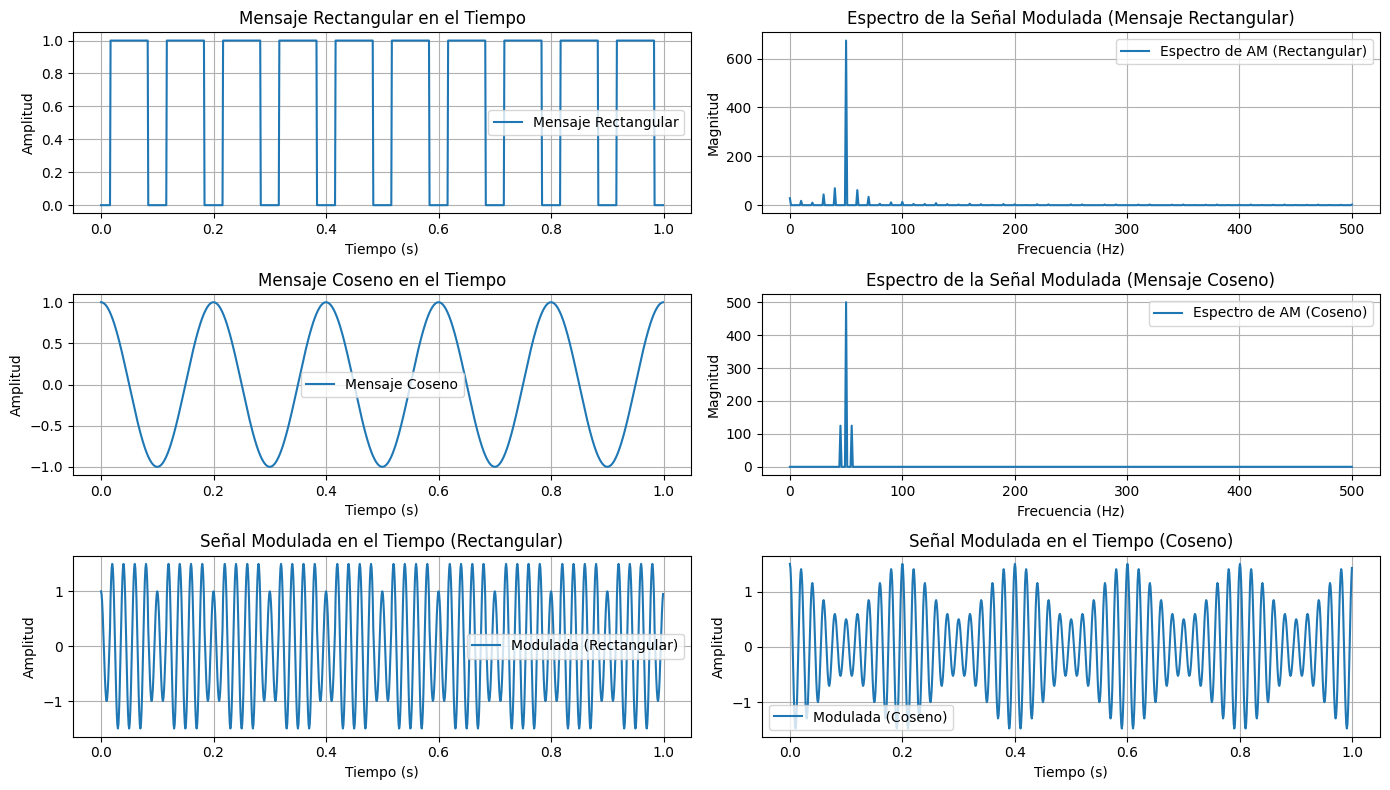

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

# Parámetros
fs = 1000          # Frecuencia de muestreo (Hz)
T = 1              # Duración de la señal (s)
t = np.linspace(0, T, int(fs*T), endpoint=False)  # Vector de tiempo

# Entradas del usuario
Am = 1             # Amplitud de la señal mensaje
fc = 50            # Frecuencia de la portadora (Hz)
fm = 5             # Frecuencia de la señal mensaje (Hz)
m = 0.5            # Índice de modulación (usuario puede modificar)

# Señales mensaje
mensaje_rect = Am * (np.abs(np.sin(2 * np.pi * fm * t)) > 0.5).astype(float)  # Pulso rectangular
mensaje_cos = Am * np.cos(2 * np.pi * fm * t)                                # Coseno

# Señales moduladas
portadora = np.cos(2 * np.pi * fc * t)
modulada_rect = (1 + m * mensaje_rect) * portadora
modulada_cos = (1 + m * mensaje_cos) * portadora

# Transformadas de Fourier
frecuencia = rfftfreq(len(t), 1/fs)
modulada_rect_fft = np.abs(rfft(modulada_rect))
modulada_cos_fft = np.abs(rfft(modulada_cos))

# Gráficos
plt.figure(figsize=(14, 8))

# Señal mensaje tipo pulso rectangular
plt.subplot(3, 2, 1)
plt.plot(t, mensaje_rect, label="Mensaje Rectangular")
plt.title("Mensaje Rectangular en el Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(frecuencia, modulada_rect_fft, label="Espectro de AM (Rectangular)")
plt.title("Espectro de la Señal Modulada (Mensaje Rectangular)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid()
plt.legend()

# Señal mensaje tipo coseno
plt.subplot(3, 2, 3)
plt.plot(t, mensaje_cos, label="Mensaje Coseno")
plt.title("Mensaje Coseno en el Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(frecuencia, modulada_cos_fft, label="Espectro de AM (Coseno)")
plt.title("Espectro de la Señal Modulada (Mensaje Coseno)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid()
plt.legend()

# Señal modulada en tiempo
plt.subplot(3, 2, 5)
plt.plot(t, modulada_rect, label="Modulada (Rectangular)")
plt.title("Señal Modulada en el Tiempo (Rectangular)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(t, modulada_cos, label="Modulada (Coseno)")
plt.title("Señal Modulada en el Tiempo (Coseno)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
